# ***Engr.Muhammad Javed***

## **DBSCAN Clustering**

## *Importing Required Libraries*


In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.cluster import KMeans , DBSCAN
from sklearn.datasets import make_moons


## *Generating a Synthetic Dataset Using Make_Moons Function*


In [3]:
x , y =make_moons(n_samples= 250 , noise= 0.05)

In [4]:
x

array([[ 9.64774565e-01,  4.09320966e-01],
       [ 4.76394801e-01,  9.07666901e-01],
       [ 7.67587062e-01,  6.95714921e-01],
       [-9.54892501e-01, -2.56574749e-02],
       [ 6.64352360e-01, -4.39064836e-01],
       [ 9.34721759e-01, -5.08913958e-01],
       [-2.17573796e-03,  1.76902311e-01],
       [-5.26391987e-01,  7.58225746e-01],
       [ 8.88752765e-01,  3.45797026e-01],
       [ 5.30748787e-01,  9.29505715e-01],
       [-1.31973930e-03,  1.01363854e+00],
       [-5.99834347e-01,  7.68790672e-01],
       [ 6.60919770e-01,  5.90472781e-01],
       [ 6.42566882e-01,  6.70327758e-01],
       [-8.22954479e-01,  5.83288395e-01],
       [ 1.45036074e+00, -4.16658538e-01],
       [ 1.13439396e+00, -5.34009479e-01],
       [ 1.51198256e+00, -3.75397904e-01],
       [-8.29473269e-01,  5.92490516e-01],
       [ 1.03329666e+00,  1.48876588e-01],
       [ 1.88499258e+00,  3.63130520e-01],
       [ 9.62903618e-01,  2.32900886e-01],
       [ 7.92180558e-01,  6.06284746e-01],
       [-4.

In [5]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0])

## *Splitting Features and target Variable*


In [8]:
Data = {"Feature 1": x[:,0] , "Feature 2": x[:,1] , "Target": y}


In [10]:
Dataset = pd.DataFrame(Data)

## *Show Dataset*


In [11]:
Dataset.head()

,Feature 1,Feature 2,Target
0,0.964775,0.409321,0
1,0.476395,0.907667,0
2,0.767587,0.695715,0
3,-0.954893,-0.025657,0
4,0.664352,-0.439065,1


In [6]:
x[:,0]

array([ 9.64774565e-01,  4.76394801e-01,  7.67587062e-01, -9.54892501e-01,
        6.64352360e-01,  9.34721759e-01, -2.17573796e-03, -5.26391987e-01,
        8.88752765e-01,  5.30748787e-01, -1.31973930e-03, -5.99834347e-01,
        6.60919770e-01,  6.42566882e-01, -8.22954479e-01,  1.45036074e+00,
        1.13439396e+00,  1.51198256e+00, -8.29473269e-01,  1.03329666e+00,
        1.88499258e+00,  9.62903618e-01,  7.92180558e-01, -4.91252892e-01,
        1.17558960e+00,  4.87325727e-01,  5.04248006e-01,  4.50129879e-01,
        1.94844267e-02,  2.20926054e-01,  2.00429794e-01,  1.41808231e+00,
        8.17602914e-01, -6.06596557e-02,  5.92332811e-01,  6.04047714e-01,
       -3.00564085e-01,  1.64116200e+00,  2.49016015e-01,  1.05403080e-02,
        1.12532456e+00,  1.97105521e+00,  5.01182645e-01,  1.82497792e+00,
        2.69862241e-01,  9.06048761e-01,  4.19601518e-02,  9.52924766e-01,
       -8.30303366e-01,  1.82341527e+00,  1.49464490e-01,  3.41830536e-01,
        2.61907879e-01,  

## *Visualizing Original Data Distribution Using Scatter Plot*

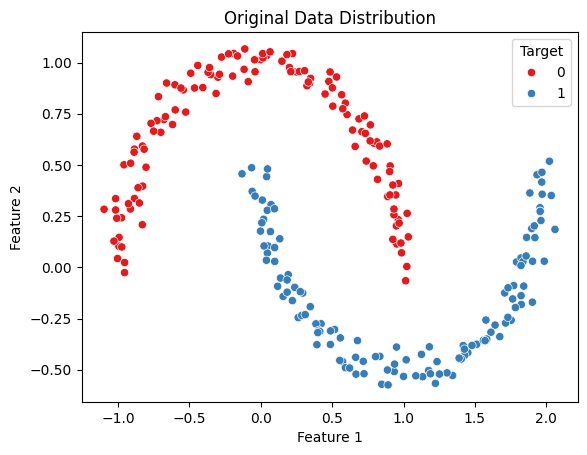

In [12]:
sn.scatterplot(x= Dataset["Feature 1"] , y= Dataset["Feature 2"] , hue= Dataset["Target"] , palette= "Set1")
plt.title("Original Data Distribution")
plt.show()

## *Plotting Data Distribution Without Class Labels*


C:\Users\HP\AppData\Local\Temp\ipykernel_22216\422643532.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(x= Dataset["Feature 1"] , y= Dataset["Feature 2"] , palette= "Set1")


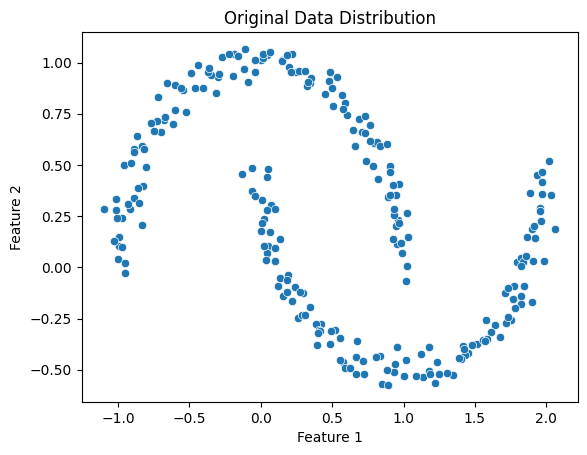

In [13]:
sn.scatterplot(x= Dataset["Feature 1"] , y= Dataset["Feature 2"] , palette= "Set1")
plt.title("Original Data Distribution")
plt.show()

## *Applying DBSCAN Clustering and Adding Cluster Labels to the Dataset*

In [ ]:
db = DBSCAN(eps=0.2 , min_samples= 5)
Dataset['DBSCAN_Labels'] = db.fit_predict(Dataset)


## *Visualizing DBSCAN Clustering Results Using Scatter Plot*

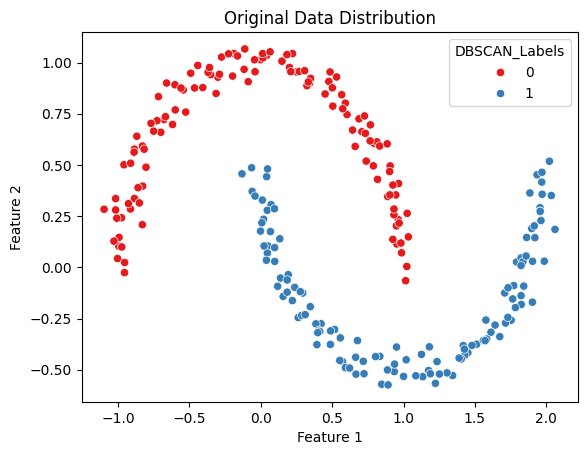

In [16]:
sn.scatterplot(x= Dataset["Feature 1"] , y= Dataset["Feature 2"] , hue= Dataset["DBSCAN_Labels"] , palette= "Set1")
plt.title("Original Data Distribution")
plt.show()